In [1]:
import numpy as np
import random
import scipy.stats
from scipy.stats import poisson
import matplotlib.pyplot as plt
%matplotlib inline


# Initial Charts

(0.0, 21.0)

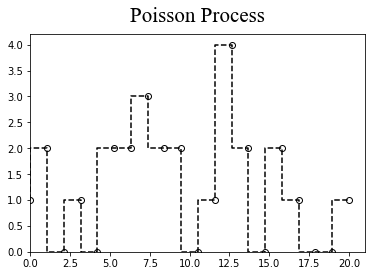

In [3]:
# Prepare data
N = 20 # step
lambdas = 1

# Draw random samples from Poisson distributions 
X_T = np.random.poisson(lambdas, size=N)

# Create x-axis 
X = np.linspace(0, N, N)

# Plot the graph
# graphs = [plt.step(X, S[i], label="Lambda = %d"%lambdas[i])[0] for i in range(len(lambdas))]

#plt.step(X, X_T, color = 'black')

#plt.legend(handles=graphs, loc=2)

# plt.plot(X, X_T, color = 'black', linestyle=':', drawstyle='steps')

#plt.plot(X, X_T, color = 'black', drawstyle= 'steps-mid')

plt.step(X, X_T, '--', color = 'black', where='pre')#, label='post')
plt.plot(X, X_T, 'o', mfc='none', color = 'black', alpha=1)

plt.title("Poisson Process", fontdict={'fontname': 'Times New Roman', 'fontsize': 21}, y=1.03)
plt.ylim(0)
plt.xlim(0,21)

(0.0, 21.0)

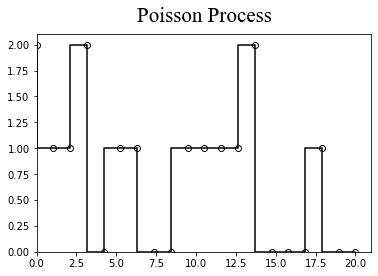

In [4]:
# Prepare data
N = 20 # step
lambdas = 1

# Draw random samples from Poisson distributions 
X_T = np.random.poisson(lambdas, size=N)

# Create x-axis 
X = np.linspace(0, N, N)

# Plot the graph
# graphs = [plt.step(X, S[i], label="Lambda = %d"%lambdas[i])[0] for i in range(len(lambdas))]

#plt.step(X, X_T, color = 'black')

#plt.legend(handles=graphs, loc=2)

# plt.plot(X, X_T, color = 'black', linestyle=':', drawstyle='steps')

#plt.plot(X, X_T, color = 'black', drawstyle= 'steps-mid')

plt.step(X, X_T, color = 'black', where='pre')#, label='post')
plt.plot(X, X_T, 'o', mfc='none', color = 'black', alpha=1)

plt.title("Poisson Process", fontdict={'fontname': 'Times New Roman', 'fontsize': 21}, y=1.03)


plt.ylim(0)
plt.xlim(0,21)

(0.0, 21.0)

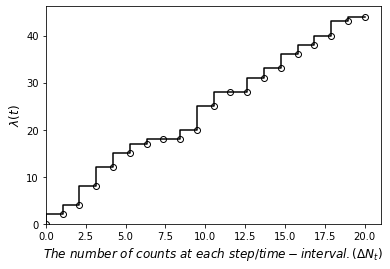

In [5]:
# Prepare data
N = 20 # step
lambdas = 2

# Draw random samples from Poisson distributions 
X_T = np.random.poisson(lambdas, size=N)

# Sum the random variables at each step - create cumulitive frequencies for each distribution
S = [np.sum(X_T[0:i]) for i in range(N)]

# Create x-axis 
X = np.linspace(0, N, N)
 
# Plot the graph
# graphs = [plt.step(X, S[i], label="Lambda = %d"%lambdas[i])[0] for i in range(len(lambdas))]
# plt.legend(handles=graphs, loc=2)

plt.step(X, S, color = 'black', where='pre')#, label='post')
plt.plot(X, S, 'o', mfc='none', color = 'black', alpha=1)

plt.xlabel("$ The \ number \ of \ counts \ at \ each \ step/time-interval. (\Delta N_t)  $", size=12)
plt.ylabel("$ \lambda (t)$", size=12)

plt.ylim(0)
plt.xlim(0)
#plt.show()

# Finding $ \lambda_k $ and Generating Synthetic data

## Function for $ \lambda_k $ and $ \Delta N_k $

Generating a synthetic data using a **FOR-LOOP** using the following iteration

$ \lambda_0 = \mu  $       
   then $ \Delta N_0 \thicksim Poi(\lambda_0) $

$ \lambda_1 = \mu + \alpha \Delta N_0  $     
   then $ \Delta N_1 \thicksim Poi(\lambda_1) $

$ \lambda_2 = \mu + \gamma \alpha \Delta N_0 + \alpha \Delta N_1  $    
   then $ \Delta N_2 \thicksim Poi(\lambda_2) $
   
$ \lambda_3 = \mu + \gamma^2 \alpha \Delta N_0 + \gamma \alpha \Delta N_1 + \alpha \Delta N_2 $    
   then $ \Delta N_3 \thicksim Poi(\lambda_3) $


***Note: The loop doesn't work for $ \mu > \lambda $ which makes sense as we are not taking anything away in the function.***


$ \lambda_0 = \mu  \ \ \rightarrow \ \ \Delta N_0 \sim Poi(\lambda_0) $

$ \lambda_1 =  \gamma (\lambda_0 -\mu )+  \mu + \alpha \Delta N_0   \ \ \rightarrow \ \ \Delta N_1 \sim Poi(\lambda_1) $

$ \lambda_2 =  \gamma (\lambda_1 -\mu )+  \mu + \alpha \Delta N_1   \ \ \rightarrow \ \ \Delta N_2 \sim Poi(\lambda_2) $

$\cdots $

In [3]:
# Initial loop to test if it works

# choose number of lambdas and data we want to generate
n = 20

# fixing the randomness
np.random.seed(5)

# fixing the two parameters
gamma = 0.01
alpha = 1.5

# Generating a random mu from 0 to 10
mu = np.random.randint(0,10, size=1)

print('mu = {}'.format(mu))
print('  ')  # some space for clarity

# First lambda(0) = mu
lambda_k = mu

# Delta_n and lambda_n empty lists
Delta_n = []
Lambda_k = []

#Generating the lambda function and synthetic data

for i in range(0,n):
    
    # draw from poisson distribution
    delta_n = np.random.poisson(lambda_k, size=1)
    
    # creating a list of the delta_n values
    Delta_n.append(delta_n)
    
    # update lambda k+1
    lambda_k = gamma*(lambda_k - mu) + mu + alpha*delta_n
    
    # creating a list of lambda_k values
    Lambda_k.append(lambda_k)
    
    # next iteration
    i = i+1
    
# Turn the lists into arrays\vectors
Delta_n = np.asarray(Delta_n)
Lambda_k = np.asarray(Lambda_k)


# Array shapes
print('Delta_n shape is {}'.format(Delta_n.shape))

print('  ')

print('Lambda_k shape is {}'.format(Lambda_k.shape))
    
print('  ') # some space for clarity

    
# What are our values
print('Delta_n = {}'.format(Delta_n))

print('  ')  # some space for clarity

print('Lambda_k = {}'.format(Lambda_k))

mu = [3]
  
Delta_n shape is (20, 1)
  
Lambda_k shape is (20, 1)
  
Delta_n = [[    1]
 [    4]
 [    9]
 [   22]
 [   36]
 [   65]
 [  103]
 [  165]
 [  257]
 [  383]
 [  593]
 [  916]
 [ 1394]
 [ 2060]
 [ 3131]
 [ 4638]
 [ 6961]
 [10310]
 [15529]
 [23363]]
  
Lambda_k = [[4.50000000e+00]
 [9.01500000e+00]
 [1.65601500e+01]
 [3.61356015e+01]
 [5.73313560e+01]
 [1.01043314e+02]
 [1.58480433e+02]
 [2.52054804e+02]
 [3.90990548e+02]
 [5.81379905e+02]
 [8.98283799e+02]
 [1.38595284e+03]
 [2.10782953e+03]
 [3.11404830e+03]
 [4.73061048e+03]
 [7.00727610e+03]
 [1.05145428e+04]
 [1.55731154e+04]
 [2.34522012e+04]
 [3.52819920e+04]]


## Function to Generate data


Good resource to see how global variables work: https://www.w3schools.com/python/python_variables_global.asp

In [22]:
def create_synthetic_data_for_loop(n, rnd_seed, mu, gamma, alpha ):


    # fixing the randomness
    np.random.seed(rnd_seed)

    # Generating a random mu from 0 to 10
    #global mu  # define global variable - variable belongs to the global scope
    #mu = np.random.randint(mu_range_low, mu_range_high , size=1)

    #print('mu = {}'.format(mu))
    #print('  ')  # some space for clarity

    # First lambda(0) = mu
    global lambda_
    lambda_ = mu

    # Delta_n and lambda_n empty lists
    global Delta_n # define global variable - variable belongs to the global scope
    Delta_n = [] 
    
    global Lambda_  # define global variable - variable belongs to the global scope
    Lambda_ = []

    #Generating the lambda function and synthetic data

    for i in range(0,n):

        # draw from poisson distribution
        delta_n = np.random.poisson(lambda_, size=1)

        # creating a list of the delta_n values
        Delta_n.append(delta_n)

        # update lambda k+1
        lambda_ = gamma*(lambda_ - mu) + mu + alpha*delta_n

        # creating a list of lambda_k values
        Lambda_.append(lambda_)

        # next iteration
        i = i+1

    # Turn the lists into arrays\vectors
    Delta_n = np.asarray(Delta_n)
    Lambda_ = np.asarray(Lambda_)


    # Array shapes
    #print('Delta_n shape is {}'.format(Delta_n.shape))

    #print('  ')

    #print('Lambda_k shape is {}'.format(Lambda_k.shape))

    #print('done') # some space for clarity

### Testing the function and plotting the data 

In [23]:
# create_synthetic_data_for_loop(n, rnd_seed, mu, gamma, alpha ):

create_synthetic_data_for_loop(n=5, rnd_seed=4, mu=2, gamma = 0.001, alpha =1.2)

Delta_n 
Lambda_

array([[ 8.        ],
       [ 8.006     ],
       [ 8.006006  ],
       [10.40600601],
       [15.20840601]])

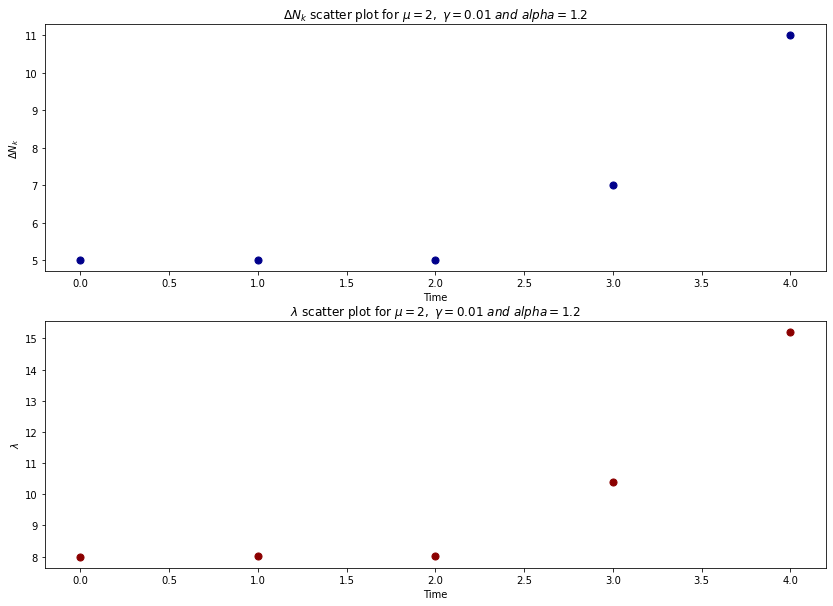

In [29]:
plt.figure( figsize = (14,10))

# sub plot 1
plt.subplot(211)
plt.scatter(range(5), Delta_n , color = 'darkblue', s= 50 )
plt.title('$\Delta N_k $ scatter plot for $ \mu = 2 , \ \gamma = 0.01 \ and \ alpha = 1.2  $')
plt.xlabel('Time')
plt.ylabel('$ \Delta N_k$');

# subplot 2
plt.subplot(212)

plt.scatter(range(5), Lambda_ , color = 'darkred', s= 50 )
plt.title('$\lambda $ scatter plot for $ \mu = 2 , \ \gamma = 0.01 \ and \ alpha = 1.2  $')
plt.xlabel('Time')
plt.ylabel('$ \lambda$');

## Looking at different data outputs given different gamma and alpha values

In [9]:
## Choice 1
gamma_1 = 0.001

create_synthetic_data_for_loop(10, 4, 2, gamma_1, 1.2)
data_small_gamma = Delta_n

# Choice 2
gamma_2 = 0.1

create_synthetic_data_for_loop(10, 4, 2, gamma_2, 1.2)
data_larger_gamma = Delta_n

# Difference
data_larger_gamma - data_small_gamma

array([[ 0],
       [ 0],
       [ 1],
       [ 6],
       [ 1],
       [ 1],
       [ 4],
       [10],
       [25],
       [25]])

In [10]:
### Difference in choosing small gamma and larger alpha

#Choice 1
gamma_1 = 0.001
alpha_1 = 1.8

create_synthetic_data_for_loop(10, 4, 2, gamma_1, alpha_1)
data_small_gamma_large_alpha = Delta_n


## Choice 2
gamma_2 = 0.1
alpha_2 = 1.1

create_synthetic_data_for_loop(10, 4, 2, gamma_2, alpha_2)
data_larger_gamma_smaller_alpha = Delta_n

# Difference
data_small_gamma_large_alpha - data_larger_gamma_smaller_alpha

array([[   0],
       [  18],
       [  32],
       [  68],
       [ 114],
       [ 207],
       [ 402],
       [ 716],
       [1314],
       [2424]])

There is a large difference in the way the data looks like given : *small gamma and large alpha* **vs** *larger gamma with smaller alpha.*

But how small is 'small' for gamma and how large is 'large' for alpha? 

# Using Synthetic data to find Negative Log-likelihood

## Negative log-likelihood

$ -Log ( L(\theta) ) =  - \sum^N_{k=1} \Delta N_k ln(\lambda_k) + \sum^N_{k=1} \lambda_k $

Here we have to use both the $ \Delta N_k $ and $\lambda $ that we created to find the -LL.

Our function ``` create_synthetic_data_for_loop(n, rnd_seed, mu, gamma, alpha)```

creates the arrays ```Delta_n``` and ```Lambda_k```

Using the function numpy.squeeze() to remove axes of length one from a, see documentation https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html

In [11]:
create_synthetic_data_for_loop(10, 4, 2, 0.001, 1.1)

# for the first part of the negative log-likelihood we have:
#-------------------------------------------------------
# the sum of the product of delta N and lambdas at k is 
# the same as the dot product between thw two vectors

a = np.squeeze(np.log(Lambda_k), axis=1)

b = np.squeeze(Delta_n, axis=1)

neg_log = np.dot( a , b ) + np.sum(Lambda_k)

print('The min. negative-log-likelihood value is {}'.format(round(neg_log,4)))


The min. negative-log-likelihood value is 666.5744


In [12]:
# Checking the squeeze function 
print(a)
print(np.log(Lambda_k))

print(b)
print(Delta_n)

[2.01490302 1.857157   2.01549025 2.38005567 2.72187457 3.08251569
 3.26651535 3.42179119 3.34739653 3.52419432]
[[2.01490302]
 [1.857157  ]
 [2.01549025]
 [2.38005567]
 [2.72187457]
 [3.08251569]
 [3.26651535]
 [3.42179119]
 [3.34739653]
 [3.52419432]]
[ 5  4  5  8 12 18 22 26 24 29]
[[ 5]
 [ 4]
 [ 5]
 [ 8]
 [12]
 [18]
 [22]
 [26]
 [24]
 [29]]


They match 

## Function for finding the negative log-likelihood 

In [ ]:
# Note: create_synthetic_data_for_loop(n, rnd_seed, mu, gamma, alpha )

# which returns two arrays with data:

#  Delta_n 
#  Lambda_ 

# Once we have the two arrays we can use the Delta_n one (the data) to constuct the negative- log -likelihood

def find_neg_log( data, mu, alpha, gamma, rnd_seed):
    
    # Given the data and paremeters we need to consturct the same amount of 
    # lambda_k values to get the negative log-likelihood
    
    n = Lambda_K.shape[1]

